In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data viz. and EDA
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## For scaling data 
from mlxtend.preprocessing import minmax_scaling 
from sklearn.metrics import plot_confusion_matrix
# Tensorflow 
import tensorflow as tf
from sklearn.preprocessing import minmax_scale
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import  plot_model
from keras import metrics
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import roc_curve

In [ ]:
data = pd.read_csv("uci_diabetes_data.csv")

In [2]:
data = pd.read_csv("dt_processed.csv")

In [3]:
# Def X and Y
X = data.drop('Outcome', 1)
y = data['Outcome']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
X_train = minmax_scaling(X_train,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
X_test = minmax_scaling(X_test,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [6]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
568,4,154.0,72.0,29.0,126.0,31.3,0.338,37
620,2,112.0,86.0,42.0,160.0,38.4,0.246,28
456,1,135.0,54.0,27.0,102.5,26.7,0.687,62
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23
714,3,102.0,74.0,27.0,102.5,29.5,0.121,32
...,...,...,...,...,...,...,...,...
264,4,123.0,62.0,32.0,169.5,32.0,0.226,35
706,10,115.0,74.5,32.0,169.5,34.3,0.261,30
194,8,85.0,55.0,20.0,102.5,24.4,0.136,42
179,5,130.0,82.0,32.0,169.5,39.1,0.956,37


In [7]:
checkpoint_filepath = "./model/model"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
)

In [8]:
callbacks = [model_checkpoint_callback]

In [9]:
def build_model(a):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(a.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [10]:
def build_model_mod(a):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(a.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)
    optimizer1 = tf.keras.optimizers.Adam(0.01)
    optimizer2 = tf.keras.optimizers.Ftrl(0.01)
    
    
    
    model.compile(loss='BinaryCrossentropy', optimizer=optimizer1, metrics=['accuracy', 'AUC', 'Precision', 'Recall', ])
    return model

In [11]:
model = build_model_mod(X_train)

In [12]:
hist = model.fit(X_train, y_train,epochs=800,verbose=1, validation_data= (X_test,y_test))

Epoch 1/800
20/20 [==============================] - 1s 42ms/step - loss: 1.3670 - accuracy: 0.6270 - auc: 0.5905 - precision: 0.4587 - recall: 0.5311 - val_loss: 0.6229 - val_accuracy: 0.6234 - val_auc: 0.7435 - val_precision: 0.6667 - val_recall: 0.0339
Epoch 2/800
20/20 [==============================] - 0s 10ms/step - loss: 0.5752 - accuracy: 0.6971 - auc: 0.7463 - precision: 0.6018 - recall: 0.3254 - val_loss: 0.5161 - val_accuracy: 0.7857 - val_auc: 0.8249 - val_precision: 0.7321 - val_recall: 0.6949
Epoch 3/800
20/20 [==============================] - 0s 10ms/step - loss: 0.5439 - accuracy: 0.7541 - auc: 0.7945 - precision: 0.6250 - recall: 0.6938 - val_loss: 0.5048 - val_accuracy: 0.7922 - val_auc: 0.8483 - val_precision: 0.7288 - val_recall: 0.7288
Epoch 4/800
20/20 [==============================] - 0s 9ms/step - loss: 0.5113 - accuracy: 0.7720 - auc: 0.8034 - precision: 0.6620 - recall: 0.6746 - val_loss: 0.5210 - val_accuracy: 0.7338 - val_auc: 0.8738 - val_precision: 0.602

Epoch 33/800
20/20 [==============================] - 0s 8ms/step - loss: 0.4089 - accuracy: 0.8257 - auc: 0.8760 - precision: 0.7802 - recall: 0.6794 - val_loss: 0.4422 - val_accuracy: 0.7727 - val_auc: 0.8823 - val_precision: 0.6622 - val_recall: 0.8305
Epoch 34/800
20/20 [==============================] - 0s 8ms/step - loss: 0.3729 - accuracy: 0.8485 - auc: 0.8998 - precision: 0.7959 - recall: 0.7464 - val_loss: 0.4372 - val_accuracy: 0.8052 - val_auc: 0.8921 - val_precision: 0.6883 - val_recall: 0.8983
Epoch 35/800
20/20 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.8420 - auc: 0.8912 - precision: 0.7887 - recall: 0.7321 - val_loss: 0.4353 - val_accuracy: 0.8442 - val_auc: 0.8795 - val_precision: 0.8431 - val_recall: 0.7288
Epoch 36/800
20/20 [==============================] - ETA: 0s - loss: 0.3696 - accuracy: 0.8550 - auc: 0.9013 - precision: 0.7857 - recall: 0.789 - 0s 8ms/step - loss: 0.3696 - accuracy: 0.8550 - auc: 0.9013 - precision: 0.7857 - re

Epoch 65/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8355 - auc: 0.8912 - precision: 0.7621 - recall: 0.7512 - val_loss: 0.5242 - val_accuracy: 0.8052 - val_auc: 0.8598 - val_precision: 0.8537 - val_recall: 0.5932
Epoch 66/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3762 - accuracy: 0.8518 - auc: 0.8973 - precision: 0.8138 - recall: 0.7321 - val_loss: 0.4644 - val_accuracy: 0.7922 - val_auc: 0.8986 - val_precision: 0.6667 - val_recall: 0.9153
Epoch 67/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3758 - accuracy: 0.8518 - auc: 0.8990 - precision: 0.7783 - recall: 0.7895 - val_loss: 0.4277 - val_accuracy: 0.8312 - val_auc: 0.8788 - val_precision: 0.8367 - val_recall: 0.6949
Epoch 68/800
20/20 [==============================] - 0s 8ms/step - loss: 0.3691 - accuracy: 0.8485 - auc: 0.9017 - precision: 0.7990 - recall: 0.7416 - val_loss: 0.3890 - val_accuracy: 0.8312 - val_auc: 0.9005 - val_precision: 0.77

Epoch 97/800
20/20 [==============================] - 0s 8ms/step - loss: 0.3111 - accuracy: 0.8746 - auc: 0.9319 - precision: 0.8300 - recall: 0.7943 - val_loss: 0.3624 - val_accuracy: 0.8506 - val_auc: 0.9128 - val_precision: 0.8000 - val_recall: 0.8136
Epoch 98/800
20/20 [==============================] - 0s 9ms/step - loss: 0.3067 - accuracy: 0.8664 - auc: 0.9345 - precision: 0.8191 - recall: 0.7799 - val_loss: 0.3899 - val_accuracy: 0.8377 - val_auc: 0.9020 - val_precision: 0.7500 - val_recall: 0.8644
Epoch 99/800
20/20 [==============================] - 0s 9ms/step - loss: 0.3117 - accuracy: 0.8795 - auc: 0.9296 - precision: 0.8261 - recall: 0.8182 - val_loss: 0.4072 - val_accuracy: 0.8442 - val_auc: 0.9045 - val_precision: 0.7465 - val_recall: 0.8983
Epoch 100/800
20/20 [==============================] - 0s 9ms/step - loss: 0.3232 - accuracy: 0.8599 - auc: 0.9231 - precision: 0.7971 - recall: 0.7895 - val_loss: 0.3763 - val_accuracy: 0.8636 - val_auc: 0.9047 - val_precision: 0.8

Epoch 129/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3120 - accuracy: 0.8697 - auc: 0.9313 - precision: 0.8209 - recall: 0.7895 - val_loss: 0.3828 - val_accuracy: 0.8247 - val_auc: 0.9058 - val_precision: 0.7286 - val_recall: 0.8644
Epoch 130/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3431 - accuracy: 0.8502 - auc: 0.9158 - precision: 0.7746 - recall: 0.7895 - val_loss: 0.3793 - val_accuracy: 0.8701 - val_auc: 0.9130 - val_precision: 0.8421 - val_recall: 0.8136
Epoch 131/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3278 - accuracy: 0.8534 - auc: 0.9265 - precision: 0.7990 - recall: 0.7608 - val_loss: 0.3596 - val_accuracy: 0.8636 - val_auc: 0.9202 - val_precision: 0.8654 - val_recall: 0.7627
Epoch 132/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2802 - accuracy: 0.8909 - auc: 0.9452 - precision: 0.8777 - recall: 0.7895 - val_loss: 0.5687 - val_accuracy: 0.7403 - val_auc: 0.9003 - val_precision: 

Epoch 161/800
20/20 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.8713 - auc: 0.9296 - precision: 0.8218 - recall: 0.7943 - val_loss: 0.3854 - val_accuracy: 0.8052 - val_auc: 0.9227 - val_precision: 0.6986 - val_recall: 0.8644
Epoch 162/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3102 - accuracy: 0.8746 - auc: 0.9331 - precision: 0.8235 - recall: 0.8038 - val_loss: 0.3995 - val_accuracy: 0.8247 - val_auc: 0.9148 - val_precision: 0.7222 - val_recall: 0.8814
Epoch 163/800
20/20 [==============================] - 0s 7ms/step - loss: 0.4082 - accuracy: 0.8176 - auc: 0.8785 - precision: 0.7513 - recall: 0.6938 - val_loss: 0.3530 - val_accuracy: 0.8442 - val_auc: 0.9113 - val_precision: 0.7869 - val_recall: 0.8136
Epoch 164/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3363 - accuracy: 0.8518 - auc: 0.9213 - precision: 0.8242 - recall: 0.7177 - val_loss: 0.3998 - val_accuracy: 0.8247 - val_auc: 0.9217 - val_precision: 

Epoch 193/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.8632 - auc: 0.9320 - precision: 0.8342 - recall: 0.7464 - val_loss: 0.3529 - val_accuracy: 0.8506 - val_auc: 0.9203 - val_precision: 0.8000 - val_recall: 0.8136
Epoch 194/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3318 - accuracy: 0.8664 - auc: 0.9275 - precision: 0.8325 - recall: 0.7608 - val_loss: 0.3569 - val_accuracy: 0.8701 - val_auc: 0.9202 - val_precision: 0.8421 - val_recall: 0.8136
Epoch 195/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2998 - accuracy: 0.8827 - auc: 0.9352 - precision: 0.8549 - recall: 0.7895 - val_loss: 0.3369 - val_accuracy: 0.8636 - val_auc: 0.9252 - val_precision: 0.8167 - val_recall: 0.8305
Epoch 196/800
20/20 [==============================] - 0s 8ms/step - loss: 0.3248 - accuracy: 0.8730 - auc: 0.9251 - precision: 0.8429 - recall: 0.7703 - val_loss: 0.3681 - val_accuracy: 0.8636 - val_auc: 0.9202 - val_precision: 

Epoch 225/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3140 - accuracy: 0.8632 - auc: 0.9297 - precision: 0.8109 - recall: 0.7799 - val_loss: 0.3546 - val_accuracy: 0.8636 - val_auc: 0.9201 - val_precision: 0.7879 - val_recall: 0.8814
Epoch 226/800
20/20 [==============================] - 0s 5ms/step - loss: 0.3431 - accuracy: 0.8485 - auc: 0.9183 - precision: 0.7710 - recall: 0.7895 - val_loss: 0.3684 - val_accuracy: 0.8571 - val_auc: 0.9220 - val_precision: 0.7606 - val_recall: 0.9153
Epoch 227/800
20/20 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.8795 - auc: 0.9314 - precision: 0.8571 - recall: 0.7751 - val_loss: 0.4096 - val_accuracy: 0.8312 - val_auc: 0.9091 - val_precision: 0.7324 - val_recall: 0.8814
Epoch 228/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2979 - accuracy: 0.8876 - auc: 0.9389 - precision: 0.8398 - recall: 0.8278 - val_loss: 0.3355 - val_accuracy: 0.9026 - val_auc: 0.9277 - val_precision: 

Epoch 257/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3137 - accuracy: 0.8746 - auc: 0.9356 - precision: 0.8143 - recall: 0.8182 - val_loss: 0.3564 - val_accuracy: 0.8766 - val_auc: 0.9171 - val_precision: 0.8846 - val_recall: 0.7797
Epoch 258/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2736 - accuracy: 0.8893 - auc: 0.9471 - precision: 0.8770 - recall: 0.7847 - val_loss: 0.3741 - val_accuracy: 0.8766 - val_auc: 0.9207 - val_precision: 0.8846 - val_recall: 0.7797
Epoch 259/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.8958 - auc: 0.9463 - precision: 0.8680 - recall: 0.8182 - val_loss: 0.3559 - val_accuracy: 0.8571 - val_auc: 0.9209 - val_precision: 0.8136 - val_recall: 0.8136
Epoch 260/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.8811 - auc: 0.9486 - precision: 0.8617 - recall: 0.7751 - val_loss: 0.3800 - val_accuracy: 0.8636 - val_auc: 0.9097 - val_precision: 

Epoch 289/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2697 - accuracy: 0.8876 - auc: 0.9491 - precision: 0.8608 - recall: 0.7990 - val_loss: 0.4737 - val_accuracy: 0.8117 - val_auc: 0.9154 - val_precision: 0.6923 - val_recall: 0.9153
Epoch 290/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3154 - accuracy: 0.8730 - auc: 0.9313 - precision: 0.8325 - recall: 0.7847 - val_loss: 0.3483 - val_accuracy: 0.8701 - val_auc: 0.9277 - val_precision: 0.8824 - val_recall: 0.7627
Epoch 291/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.8811 - auc: 0.9418 - precision: 0.8579 - recall: 0.7799 - val_loss: 0.3756 - val_accuracy: 0.8636 - val_auc: 0.9151 - val_precision: 0.8276 - val_recall: 0.8136
Epoch 292/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.8762 - auc: 0.9410 - precision: 0.8410 - recall: 0.7847 - val_loss: 0.3913 - val_accuracy: 0.8312 - val_auc: 0.9124 - val_precision: 

Epoch 321/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2818 - accuracy: 0.8811 - auc: 0.9451 - precision: 0.8434 - recall: 0.7990 - val_loss: 0.3200 - val_accuracy: 0.8766 - val_auc: 0.9335 - val_precision: 0.8704 - val_recall: 0.7966
Epoch 322/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2732 - accuracy: 0.8893 - auc: 0.9483 - precision: 0.8615 - recall: 0.8038 - val_loss: 0.3577 - val_accuracy: 0.8701 - val_auc: 0.9181 - val_precision: 0.8305 - val_recall: 0.8305
Epoch 323/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.8827 - auc: 0.9473 - precision: 0.8477 - recall: 0.7990 - val_loss: 0.3548 - val_accuracy: 0.8636 - val_auc: 0.9206 - val_precision: 0.8065 - val_recall: 0.8475
Epoch 324/800
20/20 [==============================] - 0s 18ms/step - loss: 0.3464 - accuracy: 0.8453 - auc: 0.9187 - precision: 0.7879 - recall: 0.7464 - val_loss: 0.3468 - val_accuracy: 0.8636 - val_auc: 0.9239 - val_precision:

Epoch 353/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.8893 - auc: 0.9444 - precision: 0.8543 - recall: 0.8134 - val_loss: 0.3068 - val_accuracy: 0.8766 - val_auc: 0.9394 - val_precision: 0.8333 - val_recall: 0.8475
Epoch 354/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.8876 - auc: 0.9517 - precision: 0.8646 - recall: 0.7943 - val_loss: 0.3295 - val_accuracy: 0.8701 - val_auc: 0.9278 - val_precision: 0.8421 - val_recall: 0.8136
Epoch 355/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2588 - accuracy: 0.8958 - auc: 0.9522 - precision: 0.8796 - recall: 0.8038 - val_loss: 0.3232 - val_accuracy: 0.8701 - val_auc: 0.9338 - val_precision: 0.8197 - val_recall: 0.8475
Epoch 356/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.8941 - auc: 0.9488 - precision: 0.8564 - recall: 0.8278 - val_loss: 0.3404 - val_accuracy: 0.8831 - val_auc: 0.9275 - val_precision: 

Epoch 385/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 0.8876 - auc: 0.9475 - precision: 0.8684 - recall: 0.7895 - val_loss: 0.4080 - val_accuracy: 0.8442 - val_auc: 0.9178 - val_precision: 0.8889 - val_recall: 0.6780
Epoch 386/800
20/20 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.8746 - auc: 0.9332 - precision: 0.8548 - recall: 0.7608 - val_loss: 0.3197 - val_accuracy: 0.8831 - val_auc: 0.9286 - val_precision: 0.8727 - val_recall: 0.8136
Epoch 387/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.8844 - auc: 0.9539 - precision: 0.8791 - recall: 0.7656 - val_loss: 0.3213 - val_accuracy: 0.8701 - val_auc: 0.9349 - val_precision: 0.8095 - val_recall: 0.8644
Epoch 388/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.8990 - auc: 0.9486 - precision: 0.8808 - recall: 0.8134 - val_loss: 0.3415 - val_accuracy: 0.8766 - val_auc: 0.9223 - val_precision: 

Epoch 417/800
20/20 [==============================] - 0s 8ms/step - loss: 0.2472 - accuracy: 0.9023 - auc: 0.9592 - precision: 0.8782 - recall: 0.8278 - val_loss: 0.3633 - val_accuracy: 0.8571 - val_auc: 0.9216 - val_precision: 0.8136 - val_recall: 0.8136
Epoch 418/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2474 - accuracy: 0.9007 - auc: 0.9575 - precision: 0.8627 - recall: 0.8421 - val_loss: 0.3502 - val_accuracy: 0.8636 - val_auc: 0.9177 - val_precision: 0.8167 - val_recall: 0.8305
Epoch 419/800
20/20 [==============================] - 0s 8ms/step - loss: 0.2630 - accuracy: 0.8909 - auc: 0.9494 - precision: 0.8660 - recall: 0.8038 - val_loss: 0.3955 - val_accuracy: 0.8312 - val_auc: 0.9242 - val_precision: 0.7260 - val_recall: 0.8983
Epoch 420/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.8909 - auc: 0.9508 - precision: 0.8413 - recall: 0.8373 - val_loss: 0.3464 - val_accuracy: 0.8636 - val_auc: 0.9241 - val_precision: 

Epoch 449/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2489 - accuracy: 0.8958 - auc: 0.9585 - precision: 0.8877 - recall: 0.7943 - val_loss: 0.4031 - val_accuracy: 0.8636 - val_auc: 0.9072 - val_precision: 0.8519 - val_recall: 0.7797
Epoch 450/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.8876 - auc: 0.9506 - precision: 0.8723 - recall: 0.7847 - val_loss: 0.4115 - val_accuracy: 0.8571 - val_auc: 0.9114 - val_precision: 0.8491 - val_recall: 0.7627
Epoch 451/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.8811 - auc: 0.9405 - precision: 0.8469 - recall: 0.7943 - val_loss: 0.3636 - val_accuracy: 0.8506 - val_auc: 0.9115 - val_precision: 0.7727 - val_recall: 0.8644
Epoch 452/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.8811 - auc: 0.9498 - precision: 0.8469 - recall: 0.7943 - val_loss: 0.3507 - val_accuracy: 0.8506 - val_auc: 0.9207 - val_precision: 

Epoch 481/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2768 - accuracy: 0.8730 - auc: 0.9432 - precision: 0.8503 - recall: 0.7608 - val_loss: 0.3396 - val_accuracy: 0.8636 - val_auc: 0.9273 - val_precision: 0.8276 - val_recall: 0.8136
Epoch 482/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2548 - accuracy: 0.8958 - auc: 0.9542 - precision: 0.8718 - recall: 0.8134 - val_loss: 0.3825 - val_accuracy: 0.8506 - val_auc: 0.9147 - val_precision: 0.8750 - val_recall: 0.7119
Epoch 483/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.8941 - auc: 0.9520 - precision: 0.8789 - recall: 0.7990 - val_loss: 0.4433 - val_accuracy: 0.8506 - val_auc: 0.9029 - val_precision: 0.9091 - val_recall: 0.6780
Epoch 484/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2542 - accuracy: 0.8909 - auc: 0.9551 - precision: 0.8859 - recall: 0.7799 - val_loss: 0.3576 - val_accuracy: 0.8506 - val_auc: 0.9217 - val_precision: 

Epoch 513/800
20/20 [==============================] - 0s 7ms/step - loss: 0.3116 - accuracy: 0.8632 - auc: 0.9324 - precision: 0.8049 - recall: 0.7895 - val_loss: 0.3531 - val_accuracy: 0.8571 - val_auc: 0.9165 - val_precision: 0.8491 - val_recall: 0.7627
Epoch 514/800
20/20 [==============================] - 0s 19ms/step - loss: 0.2955 - accuracy: 0.8762 - auc: 0.9408 - precision: 0.8935 - recall: 0.7225 - val_loss: 0.3692 - val_accuracy: 0.8506 - val_auc: 0.9209 - val_precision: 0.8103 - val_recall: 0.7966
Epoch 515/800
20/20 [==============================] - 0s 9ms/step - loss: 0.2560 - accuracy: 0.8990 - auc: 0.9533 - precision: 0.8769 - recall: 0.8182 - val_loss: 0.3516 - val_accuracy: 0.8571 - val_auc: 0.9230 - val_precision: 0.8246 - val_recall: 0.7966
Epoch 516/800
20/20 [==============================] - 0s 10ms/step - loss: 0.2484 - accuracy: 0.8876 - auc: 0.9592 - precision: 0.8846 - recall: 0.7703 - val_loss: 0.3630 - val_accuracy: 0.8506 - val_auc: 0.9158 - val_precision

Epoch 545/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.8958 - auc: 0.9594 - precision: 0.8680 - recall: 0.8182 - val_loss: 0.4144 - val_accuracy: 0.8117 - val_auc: 0.9177 - val_precision: 0.7143 - val_recall: 0.8475
Epoch 546/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2322 - accuracy: 0.9007 - auc: 0.9629 - precision: 0.8854 - recall: 0.8134 - val_loss: 0.3950 - val_accuracy: 0.8571 - val_auc: 0.9102 - val_precision: 0.8627 - val_recall: 0.7458
Epoch 547/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.8958 - auc: 0.9591 - precision: 0.8718 - recall: 0.8134 - val_loss: 0.4177 - val_accuracy: 0.8377 - val_auc: 0.9191 - val_precision: 0.7429 - val_recall: 0.8814
Epoch 548/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2521 - accuracy: 0.8990 - auc: 0.9527 - precision: 0.8657 - recall: 0.8325 - val_loss: 0.3697 - val_accuracy: 0.8571 - val_auc: 0.9085 - val_precision: 

Epoch 577/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.8958 - auc: 0.9608 - precision: 0.8607 - recall: 0.8278 - val_loss: 0.3529 - val_accuracy: 0.8636 - val_auc: 0.9186 - val_precision: 0.8393 - val_recall: 0.7966
Epoch 578/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.8941 - auc: 0.9558 - precision: 0.8789 - recall: 0.7990 - val_loss: 0.4320 - val_accuracy: 0.8182 - val_auc: 0.9101 - val_precision: 0.7183 - val_recall: 0.8644
Epoch 579/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.8909 - auc: 0.9442 - precision: 0.8447 - recall: 0.8325 - val_loss: 0.3831 - val_accuracy: 0.8442 - val_auc: 0.9195 - val_precision: 0.7692 - val_recall: 0.8475
Epoch 580/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2404 - accuracy: 0.9023 - auc: 0.9588 - precision: 0.8782 - recall: 0.8278 - val_loss: 0.3739 - val_accuracy: 0.8506 - val_auc: 0.9174 - val_precision: 

Epoch 609/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2562 - accuracy: 0.8827 - auc: 0.9562 - precision: 0.8341 - recall: 0.8182 - val_loss: 0.3556 - val_accuracy: 0.8571 - val_auc: 0.9218 - val_precision: 0.8136 - val_recall: 0.8136
Epoch 610/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.8941 - auc: 0.9511 - precision: 0.8789 - recall: 0.7990 - val_loss: 0.3829 - val_accuracy: 0.8571 - val_auc: 0.9088 - val_precision: 0.8936 - val_recall: 0.7119
Epoch 611/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2587 - accuracy: 0.8958 - auc: 0.9534 - precision: 0.8718 - recall: 0.8134 - val_loss: 0.4075 - val_accuracy: 0.8442 - val_auc: 0.9014 - val_precision: 0.8182 - val_recall: 0.7627
Epoch 612/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.8713 - auc: 0.9264 - precision: 0.8316 - recall: 0.7799 - val_loss: 0.4131 - val_accuracy: 0.8312 - val_auc: 0.9137 - val_precision: 

Epoch 641/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.8876 - auc: 0.9562 - precision: 0.8500 - recall: 0.8134 - val_loss: 0.3775 - val_accuracy: 0.8636 - val_auc: 0.9223 - val_precision: 0.8167 - val_recall: 0.8305
Epoch 642/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.8958 - auc: 0.9519 - precision: 0.8607 - recall: 0.8278 - val_loss: 0.3635 - val_accuracy: 0.8377 - val_auc: 0.9202 - val_precision: 0.8400 - val_recall: 0.7119
Epoch 643/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.8990 - auc: 0.9523 - precision: 0.8808 - recall: 0.8134 - val_loss: 0.3725 - val_accuracy: 0.8571 - val_auc: 0.9123 - val_precision: 0.8246 - val_recall: 0.7966
Epoch 644/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2858 - accuracy: 0.8844 - auc: 0.9436 - precision: 0.8382 - recall: 0.8182 - val_loss: 0.3605 - val_accuracy: 0.8506 - val_auc: 0.9214 - val_precision: 

Epoch 673/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2259 - accuracy: 0.8990 - auc: 0.9640 - precision: 0.8848 - recall: 0.8086 - val_loss: 0.4318 - val_accuracy: 0.8571 - val_auc: 0.9166 - val_precision: 0.7937 - val_recall: 0.8475
Epoch 674/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2674 - accuracy: 0.8893 - auc: 0.9503 - precision: 0.8310 - recall: 0.8469 - val_loss: 0.3599 - val_accuracy: 0.8636 - val_auc: 0.9198 - val_precision: 0.8519 - val_recall: 0.7797
Epoch 675/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2677 - accuracy: 0.8876 - auc: 0.9489 - precision: 0.8465 - recall: 0.8182 - val_loss: 0.4222 - val_accuracy: 0.8377 - val_auc: 0.9106 - val_precision: 0.8696 - val_recall: 0.6780
Epoch 676/800
20/20 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.8648 - auc: 0.9152 - precision: 0.8387 - recall: 0.7464 - val_loss: 0.3557 - val_accuracy: 0.8506 - val_auc: 0.9277 - val_precision: 

Epoch 705/800
20/20 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.8990 - auc: 0.9572 - precision: 0.8930 - recall: 0.7990 - val_loss: 0.4911 - val_accuracy: 0.8571 - val_auc: 0.9076 - val_precision: 0.8776 - val_recall: 0.7288
Epoch 706/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2314 - accuracy: 0.9039 - auc: 0.9627 - precision: 0.8866 - recall: 0.8230 - val_loss: 0.4090 - val_accuracy: 0.8571 - val_auc: 0.9049 - val_precision: 0.8246 - val_recall: 0.7966
Epoch 707/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2504 - accuracy: 0.8876 - auc: 0.9547 - precision: 0.8535 - recall: 0.8086 - val_loss: 0.3964 - val_accuracy: 0.8377 - val_auc: 0.9153 - val_precision: 0.7742 - val_recall: 0.8136
Epoch 708/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2350 - accuracy: 0.9039 - auc: 0.9619 - precision: 0.8713 - recall: 0.8421 - val_loss: 0.3830 - val_accuracy: 0.8701 - val_auc: 0.9136 - val_precision: 

Epoch 737/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.8941 - auc: 0.9641 - precision: 0.8495 - recall: 0.8373 - val_loss: 0.4186 - val_accuracy: 0.8506 - val_auc: 0.9082 - val_precision: 0.8000 - val_recall: 0.8136
Epoch 738/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2773 - accuracy: 0.8746 - auc: 0.9437 - precision: 0.8173 - recall: 0.8134 - val_loss: 0.3887 - val_accuracy: 0.8377 - val_auc: 0.9156 - val_precision: 0.8696 - val_recall: 0.6780
Epoch 739/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2770 - accuracy: 0.8827 - auc: 0.9464 - precision: 0.8827 - recall: 0.7560 - val_loss: 0.3353 - val_accuracy: 0.8571 - val_auc: 0.9247 - val_precision: 0.8364 - val_recall: 0.7797
Epoch 740/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.9007 - auc: 0.9574 - precision: 0.8978 - recall: 0.7990 - val_loss: 0.3650 - val_accuracy: 0.8571 - val_auc: 0.9224 - val_precision: 

20/20 [==============================] - 0s 6ms/step - loss: 0.2528 - accuracy: 0.8876 - auc: 0.9531 - precision: 0.8571 - recall: 0.8038 - val_loss: 0.3825 - val_accuracy: 0.8506 - val_auc: 0.9125 - val_precision: 0.8103 - val_recall: 0.7966
Epoch 769/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2540 - accuracy: 0.9007 - auc: 0.9547 - precision: 0.8663 - recall: 0.8373 - val_loss: 0.4016 - val_accuracy: 0.8571 - val_auc: 0.9108 - val_precision: 0.8491 - val_recall: 0.7627
Epoch 770/800
20/20 [==============================] - 0s 6ms/step - loss: 0.2298 - accuracy: 0.9023 - auc: 0.9637 - precision: 0.8670 - recall: 0.8421 - val_loss: 0.4371 - val_accuracy: 0.8701 - val_auc: 0.8951 - val_precision: 0.8980 - val_recall: 0.7458
Epoch 771/800
20/20 [==============================] - 0s 6ms/step - loss: 0.3025 - accuracy: 0.8730 - auc: 0.9364 - precision: 0.8786 - recall: 0.7273 - val_loss: 0.3665 - val_accuracy: 0.8636 - val_auc: 0.9178 - val_precision: 0.8654 - val_r

Epoch 800/800
20/20 [==============================] - 0s 7ms/step - loss: 0.2407 - accuracy: 0.9007 - auc: 0.9590 - precision: 0.8663 - recall: 0.8373 - val_loss: 0.4015 - val_accuracy: 0.8442 - val_auc: 0.9102 - val_precision: 0.8070 - val_recall: 0.7797


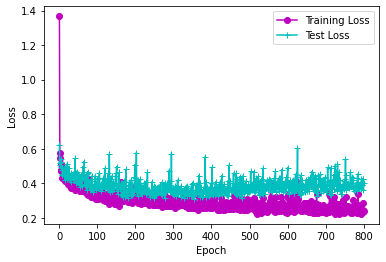

In [69]:
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'mo-')
plt.plot(epoch_count, test_loss, 'c+-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss vs epoch.pdf', dpi=400)
plt.savefig('Loss vs Epoch.png', dpi=400)
plt.show();


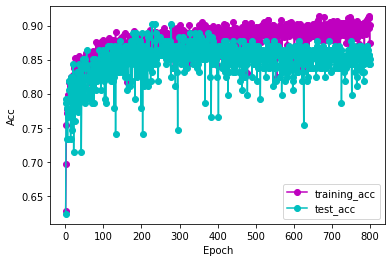

In [65]:
training_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'mo-')
plt.plot(epoch_count, test_acc, 'co-')
plt.legend(['training_acc', 'test_acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.savefig('Accuracy vs Epoch.png', dpi=400)
plt.savefig('Accuracy vs Epoch.pdf', dpi=400)
plt.show();


In [76]:
max_acc= np.amax(hist.history['val_accuracy'])

In [77]:
max_acc

0.9025974273681641

In [79]:
np.where(hist.history['val_accuracy'] == np.amax(hist.history['val_accuracy']))

(array([227, 235, 277], dtype=int64),)

In [72]:
np.min(hist.history['val_loss'])

0.3068011701107025

In [18]:
y_pred = model.predict(X_test)

In [19]:
#yw = np.argmax(y_pred,axis= -1)

In [20]:
#yw.shape

In [21]:
#row = y_pred.shape[0]

Epoch 278/800 
loss: 0.2956 - accuracy: 0.8827 - auc: 0.9363 - precision: 0.8408 - recall: 0.8086 - val_loss: 0.3153 - val_accuracy: 0.9026 - val_auc: 0.9349 - val_precision: 0.8929 - val_recall: 0.8475

In [22]:
y_pred_scaled = [round(x[0]) for x in y_pred]
print(y_pred_scaled)

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]


In [23]:
print(y_test)

568    0
620    0
456    0
197    1
714    0
      ..
264    1
706    1
194    0
179    1
514    0
Name: Outcome, Length: 154, dtype: int64


In [131]:
mod

array([[84, 11],
       [13, 46]], dtype=int64)

In [24]:
mod = confusion_matrix(y_true=y_test, y_pred= y_pred_scaled)

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.0
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
cm_plot_labels = ['Dont have diabetes','had Diabetes']

Confusion matrix, without normalization
[[84 11]
 [13 46]]


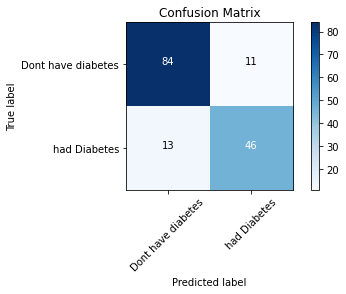

In [52]:
plot_confusion_matrix(cm=mod, classes= cm_plot_labels, title='Confusion Matrix')
plt.savefig('Confusion_matrix.pdf')
plt.savefig('Confusion_matrix.png', dpi=400)

In [130]:
print(y_test.value_counts())
print(y_pred_scaled.count(1))
print(y_pred_scaled.count(0))

0    95
1    59
Name: Outcome, dtype: int64
57
97


In [83]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [84]:

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

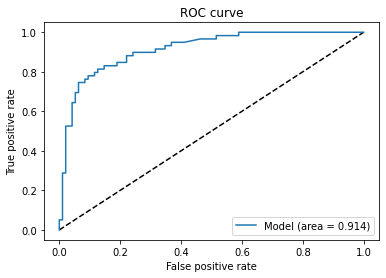

In [87]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Model (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ROC.pdf', dpi = 400)
plt.savefig('ROC.png', dpi=400)
plt.show()

In [ ]:
d1 = pd.read_csv('1.csv')

In [ ]:

model.predict(data0)

In [ ]:
data1=np.array([[3,100,80,13,80,22,.2,23]])

In [ ]:
data0 = np.array([[4,200.0,72.0,29.0,180.0,20.3,1.5,60]])

In [ ]:
X_test

In [ ]:
y_test


In [ ]:
df

In [ ]:
df.shape

In [ ]:
data.shape

In [ ]:
md = keras.models.load_model('./Saved_model/diabetes_pred_26march.h5')

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.01)

In [ ]:
md.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
md.predict(data)

In [ ]:
model.save('5_april.h5')

In [ ]:
model.save('5.1_april.h5')

In [ ]:
md.predict(data1)

In [29]:
model.save('8_april.h5')

In [ ]:
model.predict(X_test)